<a href="https://colab.research.google.com/github/vathsal14/NOVO-NEUROTECH/blob/main/PPMI_Risk_percentage_new_file_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

file_path = "PD_Final_trial_recalibrated.csv"
df = pd.read_csv(file_path)

df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2113 entries, 0 to 2112
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PATNO                2113 non-null   int64  
 1   DATSCAN_CAUDATE_R    2113 non-null   float64
 2   DATSCAN_CAUDATE_L    2113 non-null   float64
 3   DATSCAN_PUTAMEN_R    2113 non-null   float64
 4   DATSCAN_PUTAMEN_L    2113 non-null   float64
 5   NP3TOT               2113 non-null   int64  
 6   NHY                  2113 non-null   int64  
 7   UPSIT_PRCNTGE        2113 non-null   float64
 8   COGCHG               2113 non-null   int64  
 9   SBR_Caudate_R        2113 non-null   float64
 10  SBR_Caudate_L        2113 non-null   float64
 11  SBR_Putamen_R        2113 non-null   float64
 12  SBR_Putamen_L        2113 non-null   float64
 13  PCR_R                2113 non-null   float64
 14  PCR_L                2113 non-null   float64
 15  AI_Caudate           2113 non-null   f

(None,
    PATNO  DATSCAN_CAUDATE_R  DATSCAN_CAUDATE_L  DATSCAN_PUTAMEN_R  \
 0   3000               2.99               3.43               2.94   
 1   3001               2.00               1.92               0.80   
 2   3002               2.92               3.72               1.01   
 3   3003               3.63               2.54               1.11   
 4   3004               5.09               5.30               3.54   
 
    DATSCAN_PUTAMEN_L  NP3TOT  NHY  UPSIT_PRCNTGE  COGCHG  SBR_Caudate_R  \
 0               2.63       4    0           11.0       1      -0.068536   
 1               0.65      12    1           11.0       1       0.020408   
 2               1.78      17    2           11.0       1      -0.120482   
 3               0.68      29    2           11.0       1       0.176661   
 4               2.97       2    0           11.0       1      -0.020212   
 
    SBR_Caudate_L  SBR_Putamen_R  SBR_Putamen_L     PCR_R     PCR_L  \
 0       0.068536       0.055655      -0.0

In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# for col in df.columns:
#     try:
#         df[col] = pd.to_numeric(df[col])
#     except ValueError:
#         print(f"Dropping non-numeric column: {col}")
#         df = df.drop(columns=[col])

# correlations = df.corr()
# target_correlations = correlations['Parkinson_Percentage'].abs().sort_values(ascending=False)
# print(target_correlations)


# plt.figure(figsize=(12, 8))
# sns.heatmap(correlations, annot=True, cmap='coolwarm')
# plt.title("Correlation Matrix")
# plt.show()

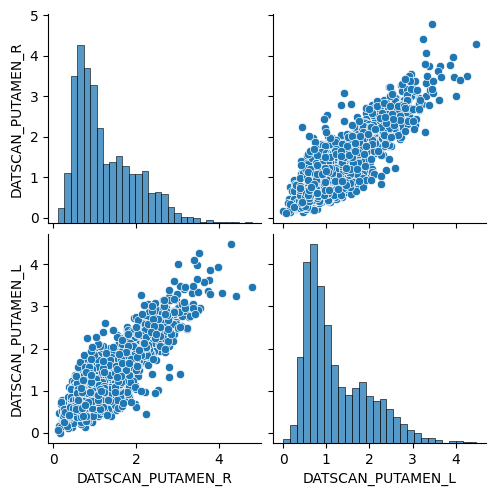

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

selected_features = ['DATSCAN_PUTAMEN_R', 'DATSCAN_PUTAMEN_L']
sns.pairplot(df[selected_features])
plt.show()

Random Forest -> MAE: 0.9487491851186997, MSE: 1.8594238705414026, R²: 0.9757767591732408
XGBoost -> MAE: 0.6143562201074689, MSE: 0.9144414167817251, R²: 0.9880873129512868
Linear Regression -> MAE: 2.9744041597992246e-09, MSE: 1.3086956193310557e-17, R²: 1.0
Cross-Validation Scores: [0.97076941 0.97546868 0.96983764 0.97294713 0.97934327]
Average R²: 0.9736732263073792


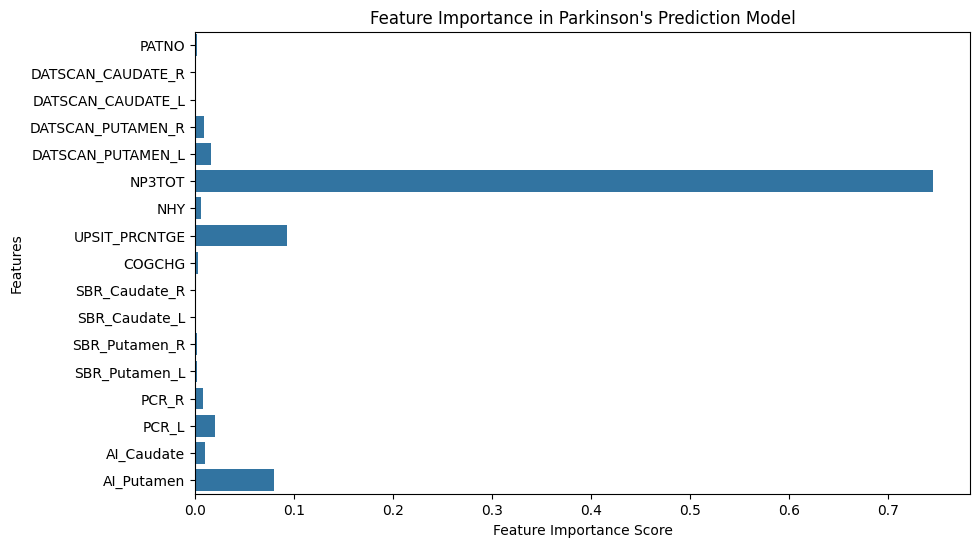

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col in categorical_cols:
    df[col] = label_encoders[col].fit_transform(df[col].astype(str))
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
X = df.drop(columns=["PD_RISK_PERCENT_NEW"])
y = df["PD_RISK_PERCENT_NEW"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
cross_val_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='r2')
rf_model.fit(X_train_scaled, y_train)

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_pred_lr = lr_model.predict(X_test_scaled)

def evaluate_model(name, y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} -> MAE: {mae}, MSE: {mse}, R²: {r2}")

evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb)
evaluate_model("Linear Regression", y_test, y_pred_lr)


cross_val_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='r2')
print("Cross-Validation Scores:", cross_val_scores)
print("Average R²:", cross_val_scores.mean())

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Parkinson's Prediction Model")
plt.show()

In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# print("Summary Statistics:")
# print(df[['PD_RISK_PERCENT', 'DATSCAN_PUTAMEN_R',
#           'DATSCAN_PUTAMEN_L', 'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L']].describe())

# fig, axes = plt.subplots(3, 2, figsize=(18, 15))

# numerical_cols = ['PD_RISK_PERCENT', 'DATSCAN_PUTAMEN_R',
#                   'DATSCAN_PUTAMEN_L', 'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L']

# for i, col in enumerate(numerical_cols):
#     sns.histplot(df[col], bins=30, kde=True, ax=axes[i // 2, i % 2])
#     axes[i // 2, i % 2].set_title(f"Distribution of {col}")

# if len(numerical_cols) < axes.size:
#     axes[-1, -1].set_visible(False)

# plt.tight_layout()
# plt.show()

# plt.figure(figsize=(10, 6))
# sns.heatmap(df[['PD_RISK_PERCENT', 'DATSCAN_PUTAMEN_R',
#                 'DATSCAN_PUTAMEN_L', 'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L']].corr(),
#             annot=True, cmap='coolwarm', fmt=".2f")
# plt.title("Correlation Heatmap")
# plt.show()

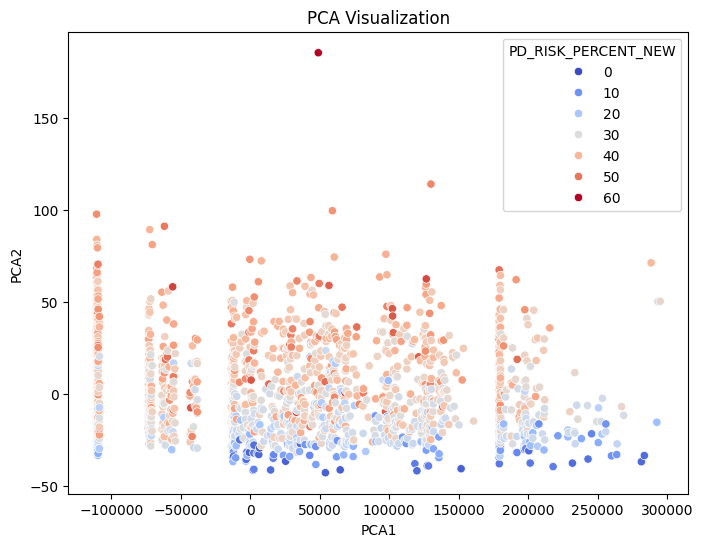

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
df['PCA1'], df['PCA2'] = pca_result[:, 0], pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue=y, palette='coolwarm', data=df)
plt.title("PCA Visualization")
plt.show()

Explained Variance: [9.99999905e-01 5.15471414e-08 2.25014815e-08]


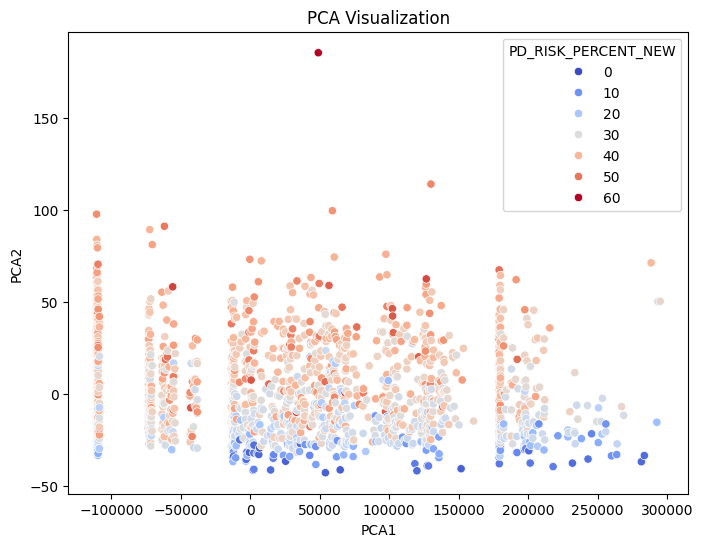

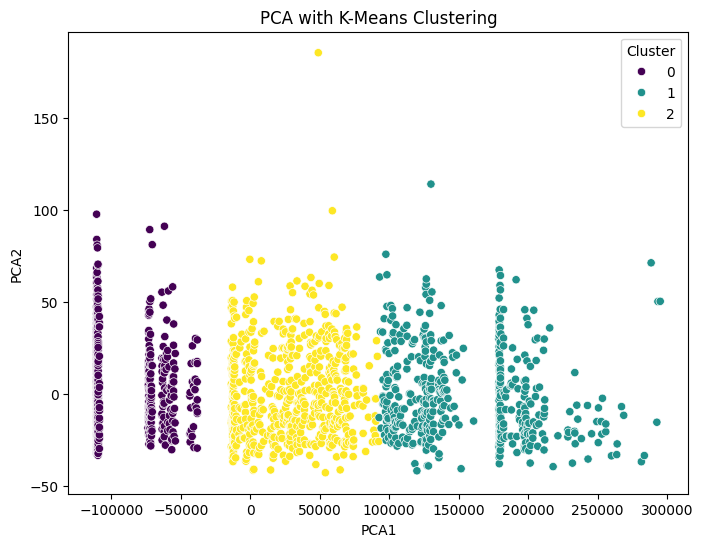

In [6]:
from sklearn.cluster import KMeans

pca = PCA(n_components=3)
pca_result = pca.fit_transform(X)
df['PCA1'], df['PCA2'], df['PCA3'] = pca_result[:, 0], pca_result[:, 1], pca_result[:, 2]

explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance: {explained_variance}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue=y, palette='coolwarm', data=df)
plt.title("PCA Visualization")
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(pca_result)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue=df['Cluster'], palette='viridis', data=df)
plt.title("PCA with K-Means Clustering")
plt.show()

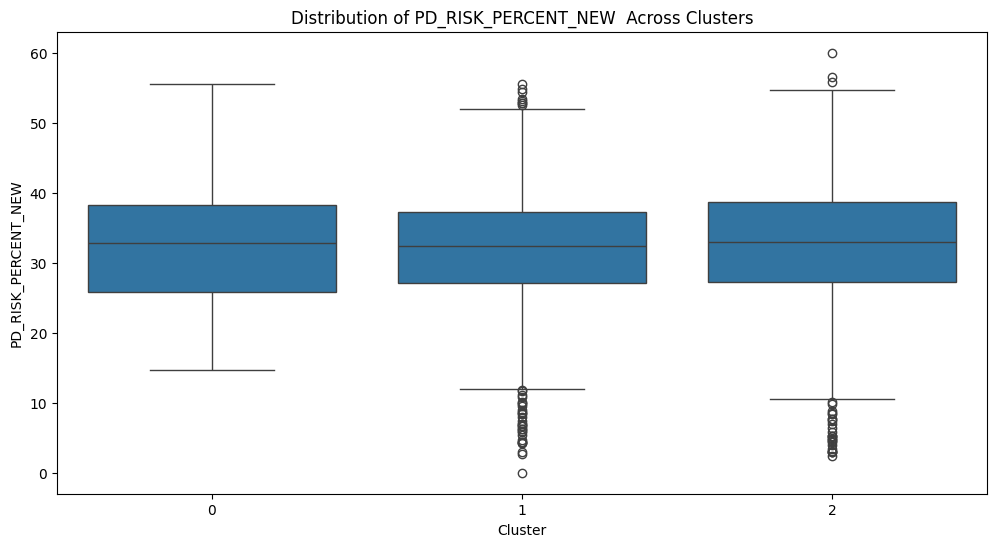

ANOVA Results: F-statistic = 1.4327068962507965, p-value = 0.23889409160171132


In [7]:
from scipy.stats import f_oneway

plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='PD_RISK_PERCENT_NEW', data=df)
plt.title("Distribution of PD_RISK_PERCENT_NEW  Across Clusters")
plt.show()

anova_results = f_oneway(
    df[df['Cluster'] == 0]['PD_RISK_PERCENT_NEW'],
    df[df['Cluster'] == 1]['PD_RISK_PERCENT_NEW'],
    df[df['Cluster'] == 2]['PD_RISK_PERCENT_NEW']
)
print(f"ANOVA Results: F-statistic = {anova_results.statistic}, p-value = {anova_results.pvalue}")

In [8]:
!pip install yellowbrick

In [9]:
!pip install umap-learn

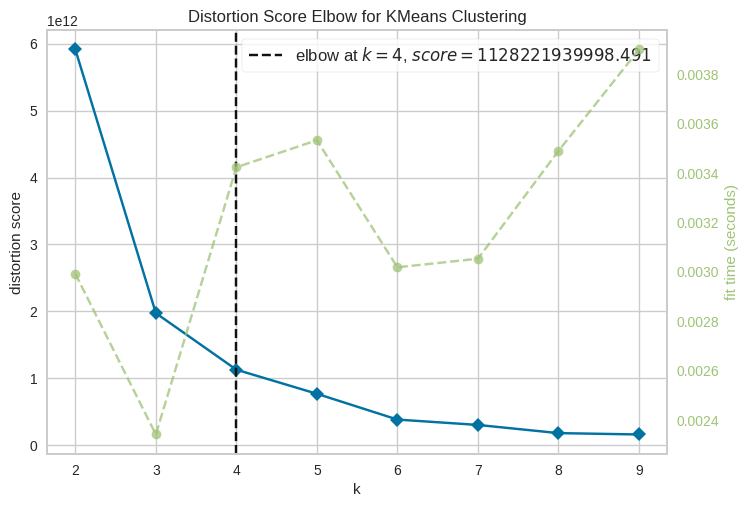

Silhouette Score: 0.7146503943185878
Calinski-Harabasz Score: 12069.633267052694
Davies-Bouldin Score: 0.44757662511035173


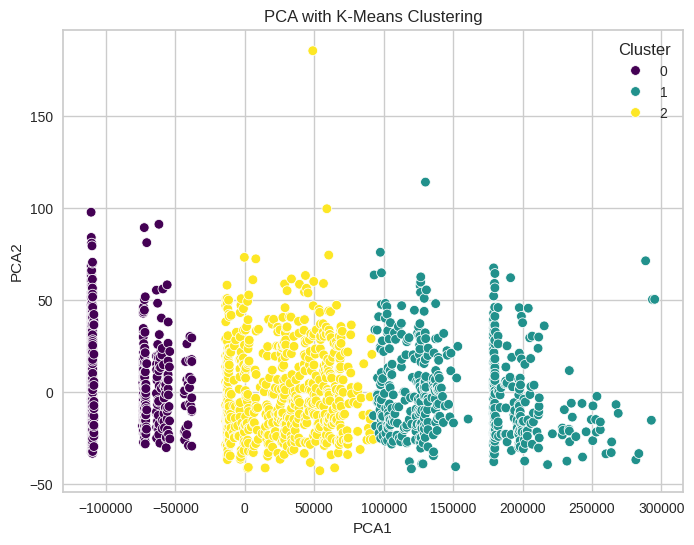

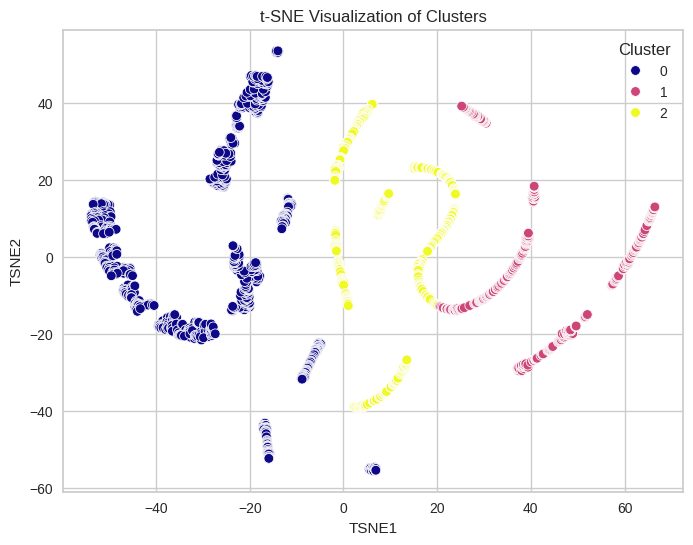

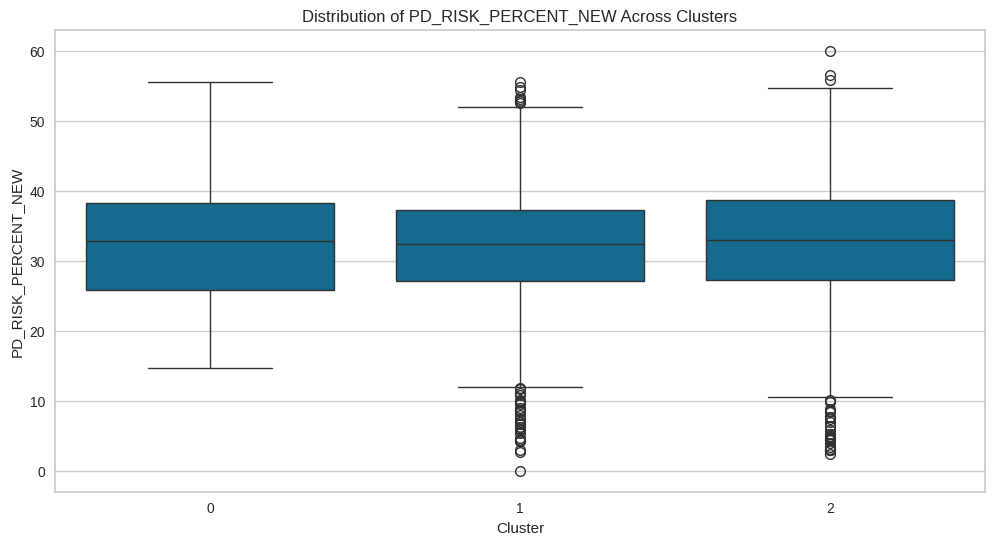

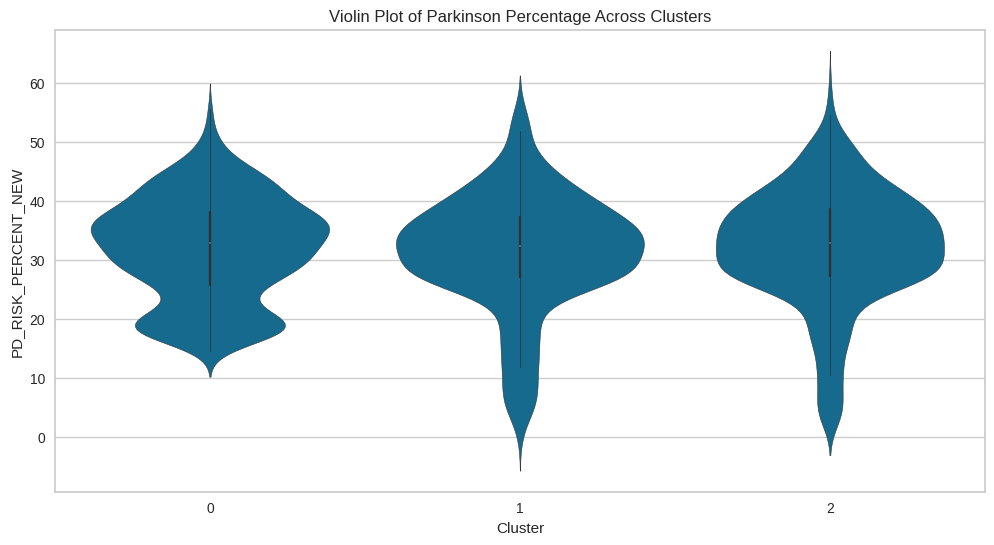

ANOVA Results: F-statistic = 1.4327068962507965, p-value = 0.23889409160171132
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.6628 0.4077  -1.879 0.5534  False
     0      2   0.2709 0.8393 -0.8558 1.3975  False
     1      2   0.9337 0.2217 -0.3868 2.2541  False
---------------------------------------------------


In [10]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.manifold import TSNE
from sklearn.ensemble import IsolationForest, RandomForestClassifier
import shap
import umap.umap_ as umap
import warnings
warnings.filterwarnings("ignore")

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
df['PCA1'], df['PCA2'] = pca_result[:, 0], pca_result[:, 1]

umap_model = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_model.fit_transform(X)
df['UMAP1'], df['UMAP2'] = umap_result[:, 0], umap_result[:, 1]

elbow_visualizer = KElbowVisualizer(KMeans(random_state=42), k=(2, 10))
elbow_visualizer.fit(pca_result)
elbow_visualizer.show()

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster_KMeans'] = kmeans.fit_predict(pca_result)

dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(pca_result)

agg_clustering = AgglomerativeClustering(n_clusters=3)
df['Cluster_Hierarchical'] = agg_clustering.fit_predict(pca_result)

gmm = GaussianMixture(n_components=3, random_state=42)
df['Cluster_GMM'] = gmm.fit_predict(pca_result)
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['Outlier_Score'] = iso_forest.fit_predict(X)

silhouette_avg = silhouette_score(pca_result, df['Cluster'])
calinski_score = calinski_harabasz_score(pca_result, df['Cluster'])
davies_bouldin = davies_bouldin_score(pca_result, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")
print(f"Calinski-Harabasz Score: {calinski_score}")
print(f"Davies-Bouldin Score: {davies_bouldin}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue=df['Cluster'], palette='viridis', data=df)
plt.title("PCA with K-Means Clustering")
plt.show()

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(X)
df['TSNE1'], df['TSNE2'] = tsne_results[:, 0], tsne_results[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue=df['Cluster'], palette='plasma', data=df)
plt.title("t-SNE Visualization of Clusters")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='PD_RISK_PERCENT_NEW', data=df)
plt.title("Distribution of PD_RISK_PERCENT_NEW Across Clusters")
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(x='Cluster', y='PD_RISK_PERCENT_NEW', data=df)
plt.title("Violin Plot of Parkinson Percentage Across Clusters")
plt.show()

anova_results = f_oneway(
    df[df['Cluster'] == 0]['PD_RISK_PERCENT_NEW'],
    df[df['Cluster'] == 1]['PD_RISK_PERCENT_NEW'],
    df[df['Cluster'] == 2]['PD_RISK_PERCENT_NEW']
)
print(f"ANOVA Results: F-statistic = {anova_results.statistic}, p-value = {anova_results.pvalue}")

tukey_results = pairwise_tukeyhsd(df['PD_RISK_PERCENT_NEW'], df['Cluster'])
print(tukey_results)


In [ ]:
# import pandas as pd
# import numpy as np

# OCCIPITAL_CORTEX_ACTIVITY = 2.0

# df['SBR_PUTAMEN_R'] = (df['DATSCAN_PUTAMEN_R'] / OCCIPITAL_CORTEX_ACTIVITY) - 1
# df['SBR_PUTAMEN_L'] = (df['DATSCAN_PUTAMEN_L'] / OCCIPITAL_CORTEX_ACTIVITY) - 1

# df['SBR_MEAN_PUTAMEN'] = (df['SBR_PUTAMEN_R'] + df['SBR_PUTAMEN_L']) / 2

# def calculate_pd_risk(sbr):
#     if sbr < 1.0:
#         return 90
#     elif sbr > 2.1:
#         return 10
#     else:
#         return (90 - ((sbr - 1.0) / (2.1 - 1.0)) * 80)

# df['PD_RISK_SBR'] = df['SBR_MEAN_PUTAMEN'].apply(calculate_pd_risk)

# df['PD_RISK_MOTOR'] = df['PD_RISK_SBR']
# df.loc[df['NP3TOT'] > 30, 'PD_RISK_MOTOR'] += 10
# df.loc[df['NP3TOT'] < 10, 'PD_RISK_MOTOR'] -= 15

# df['PD_RISK_SMELL'] = df['PD_RISK_MOTOR']
# df.loc[df['UPSIT_PRCNTGE'] < 20, 'PD_RISK_SMELL'] += 5
# df.loc[df['UPSIT_PRCNTGE'] > 80, 'PD_RISK_SMELL'] -= 10

# df['PD_RISK_COGNITIVE'] = df['PD_RISK_SMELL']
# df.loc[df['COGCHG'] == 1, 'PD_RISK_COGNITIVE'] += 5

# df['PD_RISK_FINAL'] = df['PD_RISK_COGNITIVE']
# df.loc[df['DATSCAN_VISINTRP'] == 'negative', 'PD_RISK_FINAL'] = df['PD_RISK_FINAL'].apply(lambda x: min(x, 20))

# df['PD_RISK_FINAL'] = df['PD_RISK_FINAL'].apply(lambda x: max(0, min(100, x)))

# df.head()

In [11]:
import pandas as pd
import numpy as np

OCCIPITAL_CORTEX_ACTIVITY = 2.0

df['SBR_PUTAMEN_R'] = (df['DATSCAN_PUTAMEN_R'] / OCCIPITAL_CORTEX_ACTIVITY) - 1
df['SBR_PUTAMEN_L'] = (df['DATSCAN_PUTAMEN_L'] / OCCIPITAL_CORTEX_ACTIVITY) - 1
df['SBR_MEAN_PUTAMEN'] = df[['SBR_PUTAMEN_R', 'SBR_PUTAMEN_L']].mean(axis=1)

df['PCR_R'] = df['DATSCAN_PUTAMEN_R'] / df['DATSCAN_CAUDATE_R']
df['PCR_L'] = df['DATSCAN_PUTAMEN_L'] / df['DATSCAN_CAUDATE_L']

df['AI_CAUDATE'] = ((df[['DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L']].max(axis=1) -
                      df[['DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L']].min(axis=1)) /
                      df[['DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L']].mean(axis=1)) * 100

df['AI_PUTAMEN'] = ((df[['DATSCAN_PUTAMEN_R', 'DATSCAN_PUTAMEN_L']].max(axis=1) -
                      df[['DATSCAN_PUTAMEN_R', 'DATSCAN_PUTAMEN_L']].min(axis=1)) /
                      df[['DATSCAN_PUTAMEN_R', 'DATSCAN_PUTAMEN_L']].mean(axis=1)) * 100

df['PD_RISK_PERCENT'] = (
    (1 - df[['PCR_R', 'PCR_L']].mean(axis=1)) * 25 +
    df[['AI_CAUDATE', 'AI_PUTAMEN']].mean(axis=1) * 0.4 +
    df['NP3TOT'] * 1.2 +
    (100 - df['UPSIT_PRCNTGE']) * 0.4 +
    df['COGCHG'] * 4
)

df['PD_RISK_PERCENT'] = ((df['PD_RISK_PERCENT'] - df['PD_RISK_PERCENT'].min()) /
                         (df['PD_RISK_PERCENT'].max() - df['PD_RISK_PERCENT'].min())) * 100

df['PD_RISK_PERCENT'] *= 0.6

df['PD_RISK_PERCENT'] = df['PD_RISK_PERCENT'].clip(0, 100)

df.to_csv("PD_Final_trial_updated.csv", index=False)

df.head()

,PATNO,DATSCAN_CAUDATE_R,DATSCAN_CAUDATE_L,DATSCAN_PUTAMEN_R,DATSCAN_PUTAMEN_L,NP3TOT,NHY,UPSIT_PRCNTGE,COGCHG,SBR_Caudate_R,...,Cluster_GMM,Outlier_Score,TSNE1,TSNE2,SBR_PUTAMEN_R,SBR_PUTAMEN_L,SBR_MEAN_PUTAMEN,AI_CAUDATE,AI_PUTAMEN,PD_RISK_PERCENT
0,3000,2.99,3.43,2.94,2.63,4,0,11.0,1,-0.068536,...,0,-1,-53.056896,14.342333,0.470,0.315,0.3925,13.707165,11.131059,20.793198
1,3001,2.00,1.92,0.80,0.65,12,1,11.0,1,0.020408,...,0,1,-52.786030,14.310726,-0.600,-0.675,-0.6375,4.081633,20.689655,30.730293
2,3002,2.92,3.72,1.01,1.78,17,2,11.0,1,-0.120482,...,0,1,-51.143639,14.084399,-0.495,-0.110,-0.3025,24.096386,55.197133,37.807018
3,3003,3.63,2.54,1.11,0.68,29,2,11.0,1,0.176661,...,0,1,-51.291218,14.189348,-0.445,-0.660,-0.5525,35.332253,48.044693,46.010790
4,3004,5.09,5.30,3.54,2.97,2,0,11.0,1,-0.020212,...,0,-1,-52.979347,14.338351,0.770,0.485,0.6275,4.042348,17.511521,22.188040


In [12]:
df.columns

Index(['PATNO', 'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L', 'DATSCAN_PUTAMEN_R',
       'DATSCAN_PUTAMEN_L', 'NP3TOT', 'NHY', 'UPSIT_PRCNTGE', 'COGCHG',
       'SBR_Caudate_R', 'SBR_Caudate_L', 'SBR_Putamen_R', 'SBR_Putamen_L',
       'PCR_R', 'PCR_L', 'AI_Caudate', 'AI_Putamen', 'PD_RISK_PERCENT_NEW',
       'PCA1', 'PCA2', 'PCA3', 'Cluster', 'UMAP1', 'UMAP2', 'Cluster_KMeans',
       'DBSCAN_Cluster', 'Cluster_Hierarchical', 'Cluster_GMM',
       'Outlier_Score', 'TSNE1', 'TSNE2', 'SBR_PUTAMEN_R', 'SBR_PUTAMEN_L',
       'SBR_MEAN_PUTAMEN', 'AI_CAUDATE', 'AI_PUTAMEN', 'PD_RISK_PERCENT'],
      dtype='object')

In [ ]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from scipy.stats import f_oneway, chi2_contingency
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from sklearn.model_selection import GridSearchCV

# scaler = StandardScaler()
# df[['PD_RISK_PERCENT']] = scaler.fit_transform(df[['PD_RISK_PERCENT']])

# features = ['DATSCAN_PUTAMEN_R', 'DATSCAN_PUTAMEN_L', 'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L' ,'NP3TOT', 'UPSIT_PRCNTGE', 'COGCHG']
# targets = ['PD_RISK_PERCENT']

# best_models = {}

# for target in targets:
#     X = df[features]
#     y = df[target]

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#     models = {
#         "Linear Regression": LinearRegression(),
#         "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
#         "XGBoost": XGBRegressor(objective='reg:squarederror', random_state=42)
#     }

#     results = {}
#     for name, model in models.items():
#         model.fit(X_train, y_train)
#         y_pred = model.predict(X_test)

#         mae = mean_absolute_error(y_test, y_pred)
#         rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#         r2 = r2_score(y_test, y_pred)

#         results[name] = {"MAE": mae, "RMSE": rmse, "R² Score": r2}

#     results_df = pd.DataFrame(results).T
#     print(f"\nModel Performance Comparison for {target}:")
#     print(results_df)

#     # rf_params = {
#     #     "n_estimators": [100, 200, 300],
#     #     "max_depth": [10, 20, None],
#     #     "min_samples_split": [2, 5, 10],
#     #     "min_samples_leaf": [1, 2, 4]
#     # }
#     # rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, scoring="r2", n_jobs=-1, verbose=2)
#     # rf_grid.fit(X_train, y_train)
#     # best_rf = rf_grid.best_estimator_
#     # print("\nBest Random Forest Parameters:", rf_grid.best_params_)

#     # xgb_params = {
#     #     "n_estimators": [100, 300, 500],
#     #     "learning_rate": [0.01, 0.1, 0.2],
#     #     "max_depth": [3, 6, 9],
#     #     "subsample": [0.8, 1.0]
#     # }
#     # xgb_grid = GridSearchCV(XGBRegressor(objective='reg:squarederror', random_state=42), xgb_params, cv=5, scoring="r2", n_jobs=-1, verbose=2)
#     # xgb_grid.fit(X_train, y_train)
#     # best_xgb = xgb_grid.best_estimator_
#     # print("\nBest XGBoost Parameters:", xgb_grid.best_params_)

#     # models = {"Random Forest (Tuned)": best_rf, "XGBoost (Tuned)": best_xgb}
#     # for name, model in models.items():
#     #     y_pred = model.predict(X_test)
#     #     mae = mean_absolute_error(y_test, y_pred)
#     #     rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#     #     r2 = r2_score(y_test, y_pred)

#     #     print(f"\n{name} Performance (After Tuning) for {target}:")
#     #     print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, R² Score: {r2:.4f}")

#     best_models[target] = XGBRegressor


Model Performance Comparison for PD_RISK_PERCENT:
                        MAE      RMSE  R² Score
Linear Regression  0.201361  0.249452  0.927895
Random Forest      0.154572  0.206155  0.950753
XGBoost            0.103074  0.140530  0.977116


In [ ]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# # Keeping the original features
# features = ['DATSCAN_PUTAMEN_R', 'DATSCAN_PUTAMEN_L', 'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L', 'NP3TOT', 'UPSIT_PRCNTGE', 'COGCHG']
# target = 'PD_RISK_PERCENT'

# # Splitting the data
# X = df[features]
# y = df[target]

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(df[features])  # Scale input features
# y = df[['PD_RISK_PERCENT']].values.ravel()  # Target variable (no need to scale)

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# # Define models
# models = {
#     "Linear Regression": LinearRegression(),
#     "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
#     "XGBoost": XGBRegressor(objective='reg:squarederror', random_state=42)
# }

# # Train and evaluate models
# best_models = {}
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)

#     # Store trained model
#     best_models[name] = model

# print("Model training complete!")

Model training complete!


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv('PD_Final_trial_recalibrated.csv')

features = ['DATSCAN_PUTAMEN_R', 'DATSCAN_PUTAMEN_L', 'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L', 'NP3TOT', 'UPSIT_PRCNTGE', 'COGCHG']
target = 'PD_RISK_PERCENT_NEW'

df = df.dropna(subset=features + [target])

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(df[features])

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(df[[target]]).ravel()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', random_state=42)
}

best_models = {}
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "RMSE": rmse, "R² Score": r2}
    best_models[name] = model

results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df)

final_model = best_models["XGBoost"]


Model Performance Comparison:
                        MAE      RMSE  R² Score
Linear Regression  0.201361  0.249452  0.927895
Random Forest      0.155258  0.207596  0.950062
XGBoost            0.103074  0.140530  0.977116


In [15]:
best_models.keys()

dict_keys(['Linear Regression', 'Random Forest', 'XGBoost'])

In [ ]:
# def predict_parkinson():
#     putamen_r = float(input("Enter DATSCAN_PUTAMEN_R value: "))
#     putamen_l = float(input("Enter DATSCAN_PUTAMEN_L value: "))
#     caudate_r = float(input("Enter DATSCAN_CAUDATE_R value: "))
#     caudate_l = float(input("Enter DATSCAN_CAUDATE_L value: "))
#     NP3TOT = float(input("Enter NP3TOT value: "))
#     UPSIT_PRCNTGE = float(input("Enter UPSIT_PRCNTGE value: "))
#     COGCHG = float(input("Enter COGCHG value: "))

#     input_data = np.asarray([putamen_r, putamen_l, caudate_r, caudate_l, NP3TOT, UPSIT_PRCNTGE, COGCHG]).reshape(1, -1)

#     model = best_models['PD_RISK_PERCENT']()  # Create an instance
#     # Assuming you have X_train and y_train from your previous code
#     model.fit(X_train, y_train)

#     PD_RISK_PERCENT_pred = model.predict(input_data)[0]

#     print("\nPredicted Values:")
#     print(f"Predicted Parkinson Percentage: {PD_RISK_PERCENT_pred:.2f}%")

# predict_parkinson()

Enter DATSCAN_PUTAMEN_R value: 1.02
Enter DATSCAN_PUTAMEN_L value: 0.73
Enter DATSCAN_CAUDATE_R value: 1.49
Enter DATSCAN_CAUDATE_L value: 2.21
Enter NP3TOT value: 32
Enter UPSIT_PRCNTGE value: 11
Enter COGCHG value: 1

Predicted Values:
Predicted Parkinson Percentage: 1.13%


In [ ]:
def predict_parkinson():
    putamen_r = float(input("Enter DATSCAN_PUTAMEN_R value: "))
    putamen_l = float(input("Enter DATSCAN_PUTAMEN_L value: "))
    caudate_r = float(input("Enter DATSCAN_CAUDATE_R value: "))
    caudate_l = float(input("Enter DATSCAN_CAUDATE_L value: "))
    NP3TOT = float(input("Enter NP3TOT value: "))
    UPSIT_PRCNTGE = float(input("Enter UPSIT_PRCNTGE value: "))
    COGCHG = float(input("Enter COGCHG value: "))

    input_data = np.array([[putamen_r, putamen_l, caudate_r, caudate_l, NP3TOT, UPSIT_PRCNTGE, COGCHG]])

    input_data_scaled = scaler_X.transform(input_data)
    PD_RISK_PERCENT_pred_scaled = final_model.predict(input_data_scaled)[0]

    PD_RISK_PERCENT_pred = scaler_y.inverse_transform([[PD_RISK_PERCENT_pred_scaled]])[0, 0]

    print("\nPredicted Values:")
    print(f"Predicted Parkinson's Risk Percentage: {PD_RISK_PERCENT_pred:.2f}%")
predict_parkinson()


# Enter DATSCAN_PUTAMEN_R value: 2.53
# Enter DATSCAN_PUTAMEN_L value: 2.71
# Enter DATSCAN_CAUDATE_R value: 3.28
# Enter DATSCAN_CAUDATE_L value: 3.2
# Enter NP3TOT value: 3
# Enter UPSIT_PRCNTGE value: 11
# Enter COGCHG value: 1

In [ ]:
# 0def predict_parkinson(input_data):
#     input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)

#     putamen_ratio_pred = best_models['Putamen_Ratio'].predict(input_data_as_numpy_array)[0]
#     parkinson_percentage_pred = best_models['Parkinson_Percentage'].predict(input_data_as_numpy_array)[0]

#     print("\nPredicted Values:")
#     print(f"Predicted Putamen Ratio: {putamen_ratio_pred:.4f}")
#     print(f"Predicted Parkinson Percentage: {parkinson_percentage_pred:.2f}%")

#     return putamen_ratio_pred, parkinson_percentage_pred

# caudate_r = float(input("Enter DATSCAN_CAUDATE_R value: "))
# caudate_l = float(input("Enter DATSCAN_CAUDATE_L value: "))
# putamen_r = float(input("Enter DATSCAN_PUTAMEN_R value: "))
# putamen_l = float(input("Enter DATSCAN_PUTAMEN_L value: "))

# user_input = (caudate_r, caudate_l, putamen_r, putamen_l)
# predict_parkinson(user_input)